In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Dropout
from keras.layers import Conv2D, MaxPooling2D
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
%matplotlib inline

Using TensorFlow backend.


In [2]:
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [3]:
data_1 = unpickle("./cifar-10-batches-py/data_batch_1")

In [4]:
data_2 = unpickle("./cifar-10-batches-py/data_batch_2")

In [5]:
data_3 = unpickle("./cifar-10-batches-py/data_batch_3")

In [6]:
data_4 = unpickle("./cifar-10-batches-py/data_batch_4")

In [7]:
data_5 = unpickle("./cifar-10-batches-py/data_batch_5")

In [8]:
data_1[b'data'].shape

(10000, 3072)

In [9]:
data_1[b'data'][0].shape

(3072,)

In [10]:
data_1[b'data'][0]

array([ 59,  43,  50, ..., 140,  84,  72], dtype=uint8)

In [11]:
onehot = OneHotEncoder(sparse=False)
shaped = np.reshape(data_1[b'labels'], (-1,1))
onehot.fit(shaped)

OneHotEncoder(categorical_features='all', dtype=<class 'numpy.float64'>,
       handle_unknown='error', n_values='auto', sparse=False)

In [12]:
onehot_2 = OneHotEncoder(sparse=False)
shaped_2 = np.reshape(data_2[b'labels'], (-1,1))
onehot_2.fit(shaped_2)

OneHotEncoder(categorical_features='all', dtype=<class 'numpy.float64'>,
       handle_unknown='error', n_values='auto', sparse=False)

In [13]:
onehot_3 = OneHotEncoder(sparse=False)
shaped_3 = np.reshape(data_3[b'labels'], (-1,1))
onehot_3.fit(shaped_3)

OneHotEncoder(categorical_features='all', dtype=<class 'numpy.float64'>,
       handle_unknown='error', n_values='auto', sparse=False)

In [14]:
onehot_4 = OneHotEncoder(sparse=False)
shaped_4 = np.reshape(data_4[b'labels'], (-1,1))
onehot_4.fit(shaped_4)

OneHotEncoder(categorical_features='all', dtype=<class 'numpy.float64'>,
       handle_unknown='error', n_values='auto', sparse=False)

In [15]:
onehot_5 = OneHotEncoder(sparse=False)
shaped_5 = np.reshape(data_5[b'labels'], (-1,1))
onehot_5.fit(shaped_5)

OneHotEncoder(categorical_features='all', dtype=<class 'numpy.float64'>,
       handle_unknown='error', n_values='auto', sparse=False)

In [16]:
y_var = onehot.transform(shaped)
y_var.shape

(10000, 10)

In [17]:
y_var_2 = onehot.transform(shaped_2)
y_var_3 = onehot.transform(shaped_3)
y_var_4 = onehot.transform(shaped_4)
y_var_5 = onehot.transform(shaped_5)

In [18]:
image_0 = data_1[b'data'][1000].reshape([3,32,32])
np.rollaxis(image_0,0,3).shape

(32, 32, 3)

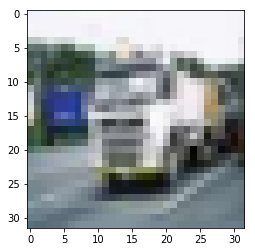

In [19]:
plt.imshow(np.rollaxis(image_0,0,3))

In [20]:
images = []
for data in data_1[b'data']:
    data = data.reshape([3,32,32])
    images.append(data)
#data_1[b'data'].map(lambda x: x.reshape([3,32,32]))
#np.rollaxis(image_0,0,3).shape
images_roll = []
for image in images:
    image = np.rollaxis(image,0,3)
    images_roll.append(image)


In [21]:
images_2 = []
for data in data_2[b'data']:
    data = data.reshape([3,32,32])
    images_2.append(data)
#data_1[b'data'].map(lambda x: x.reshape([3,32,32]))
#np.rollaxis(image_0,0,3).shape
images_roll_2 = []
for image in images_2:
    image = np.rollaxis(image,0,3)
    images_roll_2.append(image)

In [22]:
images_3 = []
for data in data_3[b'data']:
    data = data.reshape([3,32,32])
    images_3.append(data)
#data_1[b'data'].map(lambda x: x.reshape([3,32,32]))
#np.rollaxis(image_0,0,3).shape
images_roll_3 = []
for image in images_3:
    image = np.rollaxis(image,0,3)
    images_roll_3.append(image)

In [23]:
images_4 = []
for data in data_4[b'data']:
    data = data.reshape([3,32,32])
    images_4.append(data)
#data_1[b'data'].map(lambda x: x.reshape([3,32,32]))
#np.rollaxis(image_0,0,3).shape
images_roll_4 = []
for image in images_4:
    image = np.rollaxis(image,0,3)
    images_roll_4.append(image)

In [24]:
images_5 = []
for data in data_5[b'data']:
    data = data.reshape([3,32,32])
    images_5.append(data)
#data_1[b'data'].map(lambda x: x.reshape([3,32,32]))
#np.rollaxis(image_0,0,3).shape
images_roll_5 = []
for image in images_5:
    image = np.rollaxis(image,0,3)
    images_roll_5.append(image)

In [25]:
images_roll = np.asarray(images_roll)
image_one = images_roll[1]


In [26]:
images_roll_2 = np.asarray(images_roll_2)
images_roll_3 = np.asarray(images_roll_3)
images_roll_4 = np.asarray(images_roll_4)
images_roll_5 = np.asarray(images_roll_5)

In [27]:
images = np.concatenate((images_roll,images_roll_3),axis=0)
images = np.concatenate((images,images_roll_4),axis=0)
images = np.concatenate((images,images_roll_5),axis=0)
images = np.concatenate((images,images_roll_2),axis=0)
images.shape

(50000, 32, 32, 3)

In [28]:
y = np.concatenate((y_var,y_var_3),axis=0)
y = np.concatenate((y,y_var_4),axis=0)
y = np.concatenate((y,y_var_5),axis=0)
y = np.concatenate((y,y_var_2),axis=0)
y.shape

(50000, 10)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(images, y, test_size= .2)

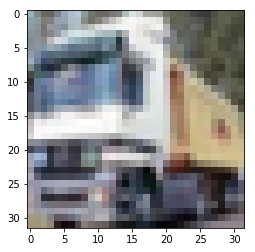

In [30]:
image_1 = images_roll[1]
plt.imshow(image_1)

In [46]:
model = Sequential()
model.add(Dense(64, input_shape=(3072,)))
model.add(Dropout(.25))
model.add(Dense(128))
model.add(Dropout(.1))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [47]:
model.fit(x=data_1[b'data']/255, y=y_var, batch_size=None, epochs=2000, verbose=1, callbacks=None, validation_split=0.2, validation_data=None, shuffle=True, class_weight=None, sample_weight=None, initial_epoch=0, steps_per_epoch=None, validation_steps=None)


Train on 8000 samples, validate on 2000 samples
Epoch 1/2000
8000/8000 [==============================] - 3s 335us/step - loss: 3.4326 - acc: 0.1791 - val_loss: 2.2253 - val_acc: 0.2290
Epoch 2/2000
8000/8000 [==============================] - 2s 213us/step - loss: 2.2689 - acc: 0.2146 - val_loss: 2.0181 - val_acc: 0.2565
Epoch 3/2000
8000/8000 [==============================] - 2s 220us/step - loss: 2.2057 - acc: 0.2281 - val_loss: 2.0382 - val_acc: 0.2845
Epoch 4/2000
8000/8000 [==============================] - 2s 279us/step - loss: 2.1817 - acc: 0.2469 - val_loss: 1.9699 - val_acc: 0.2800
Epoch 5/2000
8000/8000 [==============================] - 2s 230us/step - loss: 2.1106 - acc: 0.2590 - val_loss: 2.4490 - val_acc: 0.2065
Epoch 6/2000
8000/8000 [==============================] - 2s 214us/step - loss: 2.0775 - acc: 0.2684 - val_loss: 1.8798 - val_acc: 0.3100
Epoch 7/2000
8000/8000 [==============================] - 2s 215us/step - loss: 2.0227 - acc: 0.2801 - val_loss: 1.9939 - va

Epoch 118/2000
8000/8000 [==============================] - 2s 193us/step - loss: 1.5840 - acc: 0.4550 - val_loss: 1.9895 - val_acc: 0.3365
Epoch 119/2000
8000/8000 [==============================] - 2s 196us/step - loss: 1.5727 - acc: 0.4507 - val_loss: 2.1343 - val_acc: 0.3035
Epoch 120/2000
8000/8000 [==============================] - 2s 194us/step - loss: 1.5873 - acc: 0.4465 - val_loss: 1.8912 - val_acc: 0.3490
Epoch 121/2000
8000/8000 [==============================] - 2s 193us/step - loss: 1.5769 - acc: 0.4527 - val_loss: 1.9333 - val_acc: 0.3670
Epoch 122/2000
8000/8000 [==============================] - 2s 195us/step - loss: 1.5869 - acc: 0.4441 - val_loss: 1.8616 - val_acc: 0.3650
Epoch 123/2000
8000/8000 [==============================] - 2s 205us/step - loss: 1.5804 - acc: 0.4504 - val_loss: 1.9397 - val_acc: 0.3505
Epoch 124/2000
8000/8000 [==============================] - 2s 208us/step - loss: 1.5806 - acc: 0.4549 - val_loss: 1.9403 - val_acc: 0.3540
Epoch 125/2000
8000/

8000/8000 [==============================] - 2s 192us/step - loss: 1.4848 - acc: 0.4870 - val_loss: 1.9796 - val_acc: 0.3550
Epoch 235/2000
8000/8000 [==============================] - 2s 193us/step - loss: 1.4757 - acc: 0.4880 - val_loss: 2.0934 - val_acc: 0.3120
Epoch 236/2000
8000/8000 [==============================] - 2s 194us/step - loss: 1.4862 - acc: 0.4806 - val_loss: 1.9754 - val_acc: 0.3500
Epoch 237/2000
8000/8000 [==============================] - 2s 193us/step - loss: 1.4816 - acc: 0.4834 - val_loss: 2.0079 - val_acc: 0.3415
Epoch 238/2000
8000/8000 [==============================] - 2s 205us/step - loss: 1.4775 - acc: 0.4890 - val_loss: 1.9388 - val_acc: 0.3645
Epoch 239/2000
8000/8000 [==============================] - 2s 202us/step - loss: 1.4884 - acc: 0.4775 - val_loss: 2.0760 - val_acc: 0.3240
Epoch 240/2000
8000/8000 [==============================] - 2s 192us/step - loss: 1.4818 - acc: 0.4873 - val_loss: 2.0012 - val_acc: 0.3360
Epoch 241/2000
8000/8000 [=========

8000/8000 [==============================] - 2s 230us/step - loss: 1.4234 - acc: 0.5109 - val_loss: 2.2539 - val_acc: 0.3095
Epoch 351/2000
8000/8000 [==============================] - 2s 191us/step - loss: 1.4263 - acc: 0.5028 - val_loss: 2.0033 - val_acc: 0.3530
Epoch 352/2000
8000/8000 [==============================] - 2s 195us/step - loss: 1.4296 - acc: 0.5074 - val_loss: 2.0785 - val_acc: 0.3405
Epoch 353/2000
8000/8000 [==============================] - 2s 197us/step - loss: 1.4281 - acc: 0.5142 - val_loss: 1.9978 - val_acc: 0.3475
Epoch 354/2000
8000/8000 [==============================] - 2s 193us/step - loss: 1.4192 - acc: 0.5154 - val_loss: 2.1611 - val_acc: 0.3380
Epoch 355/2000
8000/8000 [==============================] - 2s 193us/step - loss: 1.4195 - acc: 0.5108 - val_loss: 2.0355 - val_acc: 0.3515
Epoch 356/2000
8000/8000 [==============================] - 2s 194us/step - loss: 1.4162 - acc: 0.5121 - val_loss: 2.1395 - val_acc: 0.3375
Epoch 357/2000
8000/8000 [=========

8000/8000 [==============================] - 2s 192us/step - loss: 1.3735 - acc: 0.5186 - val_loss: 2.2642 - val_acc: 0.3030
Epoch 467/2000
8000/8000 [==============================] - 2s 194us/step - loss: 1.3744 - acc: 0.5280 - val_loss: 2.1274 - val_acc: 0.3430
Epoch 468/2000
8000/8000 [==============================] - 2s 196us/step - loss: 1.3841 - acc: 0.5160 - val_loss: 2.0516 - val_acc: 0.3445
Epoch 469/2000
8000/8000 [==============================] - 2s 194us/step - loss: 1.3564 - acc: 0.5276 - val_loss: 2.0809 - val_acc: 0.3435
Epoch 470/2000
8000/8000 [==============================] - 2s 191us/step - loss: 1.3716 - acc: 0.5285 - val_loss: 2.1116 - val_acc: 0.3340
Epoch 471/2000
8000/8000 [==============================] - 2s 198us/step - loss: 1.3646 - acc: 0.5336 - val_loss: 2.2252 - val_acc: 0.3190
Epoch 472/2000
8000/8000 [==============================] - 2s 192us/step - loss: 1.3615 - acc: 0.5272 - val_loss: 2.1335 - val_acc: 0.3420
Epoch 473/2000
8000/8000 [=========

8000/8000 [==============================] - 2s 192us/step - loss: 1.3334 - acc: 0.5404 - val_loss: 2.1812 - val_acc: 0.3335
Epoch 583/2000
8000/8000 [==============================] - 2s 190us/step - loss: 1.3210 - acc: 0.5402 - val_loss: 2.1685 - val_acc: 0.3355
Epoch 584/2000
8000/8000 [==============================] - 2s 191us/step - loss: 1.3294 - acc: 0.5410 - val_loss: 2.1574 - val_acc: 0.3350
Epoch 585/2000
8000/8000 [==============================] - 2s 189us/step - loss: 1.3260 - acc: 0.5435 - val_loss: 2.3266 - val_acc: 0.2990
Epoch 586/2000
8000/8000 [==============================] - 2s 199us/step - loss: 1.3230 - acc: 0.5478 - val_loss: 2.1580 - val_acc: 0.3265
Epoch 587/2000
8000/8000 [==============================] - 2s 191us/step - loss: 1.3282 - acc: 0.5455 - val_loss: 2.1789 - val_acc: 0.3350
Epoch 588/2000
8000/8000 [==============================] - 2s 194us/step - loss: 1.3301 - acc: 0.5387 - val_loss: 2.1193 - val_acc: 0.3385
Epoch 589/2000
8000/8000 [=========

8000/8000 [==============================] - 2s 192us/step - loss: 1.3024 - acc: 0.5465 - val_loss: 2.3188 - val_acc: 0.3130
Epoch 699/2000
8000/8000 [==============================] - 2s 190us/step - loss: 1.2998 - acc: 0.5520 - val_loss: 2.2637 - val_acc: 0.3165
Epoch 700/2000
8000/8000 [==============================] - 2s 192us/step - loss: 1.3144 - acc: 0.5389 - val_loss: 2.4367 - val_acc: 0.3110
Epoch 701/2000
8000/8000 [==============================] - 2s 200us/step - loss: 1.2975 - acc: 0.5514 - val_loss: 2.2607 - val_acc: 0.3175
Epoch 702/2000
8000/8000 [==============================] - 2s 193us/step - loss: 1.2893 - acc: 0.5514 - val_loss: 2.2457 - val_acc: 0.3335
Epoch 703/2000
8000/8000 [==============================] - 2s 192us/step - loss: 1.2944 - acc: 0.5497 - val_loss: 2.3741 - val_acc: 0.3305
Epoch 704/2000
8000/8000 [==============================] - 2s 195us/step - loss: 1.2843 - acc: 0.5614 - val_loss: 2.4092 - val_acc: 0.3215
Epoch 705/2000
8000/8000 [=========

8000/8000 [==============================] - 2s 192us/step - loss: 1.2738 - acc: 0.5634 - val_loss: 2.2684 - val_acc: 0.3205
Epoch 815/2000
8000/8000 [==============================] - 2s 193us/step - loss: 1.2761 - acc: 0.5534 - val_loss: 2.2461 - val_acc: 0.3220
Epoch 816/2000
8000/8000 [==============================] - 2s 192us/step - loss: 1.2760 - acc: 0.5574 - val_loss: 2.3608 - val_acc: 0.3135
Epoch 817/2000
8000/8000 [==============================] - 2s 193us/step - loss: 1.2684 - acc: 0.5592 - val_loss: 2.5304 - val_acc: 0.2910
Epoch 818/2000
8000/8000 [==============================] - 2s 192us/step - loss: 1.2675 - acc: 0.5623 - val_loss: 2.2027 - val_acc: 0.3430
Epoch 819/2000
8000/8000 [==============================] - 2s 193us/step - loss: 1.2787 - acc: 0.5584 - val_loss: 2.2857 - val_acc: 0.3110
Epoch 820/2000
8000/8000 [==============================] - 2s 193us/step - loss: 1.2689 - acc: 0.5660 - val_loss: 2.1974 - val_acc: 0.3325
Epoch 821/2000
8000/8000 [=========

8000/8000 [==============================] - 2s 214us/step - loss: 1.2560 - acc: 0.5660 - val_loss: 2.2662 - val_acc: 0.3345
Epoch 931/2000
8000/8000 [==============================] - 2s 217us/step - loss: 1.2335 - acc: 0.5735 - val_loss: 2.2599 - val_acc: 0.3350
Epoch 932/2000
8000/8000 [==============================] - 2s 199us/step - loss: 1.2607 - acc: 0.5640 - val_loss: 2.2559 - val_acc: 0.3325
Epoch 933/2000
8000/8000 [==============================] - 2s 202us/step - loss: 1.2512 - acc: 0.5689 - val_loss: 2.3381 - val_acc: 0.3170
Epoch 934/2000
8000/8000 [==============================] - 2s 234us/step - loss: 1.2458 - acc: 0.5737 - val_loss: 2.4757 - val_acc: 0.3070
Epoch 935/2000
8000/8000 [==============================] - 2s 202us/step - loss: 1.2462 - acc: 0.5717 - val_loss: 2.3551 - val_acc: 0.3145
Epoch 936/2000
8000/8000 [==============================] - 2s 201us/step - loss: 1.2441 - acc: 0.5737 - val_loss: 2.2590 - val_acc: 0.3400
Epoch 937/2000
8000/8000 [=========

KeyboardInterrupt: 

In [181]:
model_conv = Sequential()
model_conv.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1),
                 activation='relu',
                 input_shape=(32,32,3)))
model_conv.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model_conv.add(Conv2D(64, (5, 5), activation='relu'))
model_conv.add(MaxPooling2D(pool_size=(2, 2)))
model_conv.add(Flatten())
model_conv.add(Dense(1000, activation='relu'))
model_conv.add(Dense(10, activation='softmax'))

In [182]:
model_conv.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.SGD(lr=0.01),
              metrics=['accuracy'])

In [229]:
model_conv.fit(images/255, y,
          batch_size=None,
          epochs=100,
          verbose=1,
          validation_split=0.2,
          validation_data=None,
          callbacks=None)

Train on 40000 samples, validate on 10000 samples
Epoch 1/100
40000/40000 [==============================] - 130s 3ms/step - loss: 2.1050 - acc: 0.4802 - val_loss: 1.3734 - val_acc: 0.5052
Epoch 2/100
40000/40000 [==============================] - 131s 3ms/step - loss: 1.5476 - acc: 0.5199 - val_loss: 5.8688 - val_acc: 0.5062
Epoch 3/100
40000/40000 [==============================] - 131s 3ms/step - loss: 1.5787 - acc: 0.5350 - val_loss: 1.6339 - val_acc: 0.5105
Epoch 4/100
40000/40000 [==============================] - 128s 3ms/step - loss: 1.6131 - acc: 0.5229 - val_loss: 1.2297 - val_acc: 0.5809
Epoch 5/100
40000/40000 [==============================] - 133s 3ms/step - loss: 1.7151 - acc: 0.5084 - val_loss: 1.4373 - val_acc: 0.4518
Epoch 6/100
40000/40000 [==============================] - 131s 3ms/step - loss: 1.7538 - acc: 0.4986 - val_loss: 1.5796 - val_acc: 0.4571
Epoch 7/100
40000/40000 [==============================] - 132s 3ms/step - loss: 1.7382 - acc: 0.4879 - val_loss: 1.

In [333]:
model_conv = Sequential()
model_conv.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1),
                 activation='relu',
                 input_shape=(32,32,3)))
model_conv.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1)))
model_conv.add(Dropout(.1))
model_conv.add(Conv2D(64, (5, 5), activation='relu'))
model_conv.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1)))
model_conv.add(Dropout(.1))
model_conv.add(Conv2D(32, (4, 4), activation='relu'))
model_conv.add(MaxPooling2D(pool_size=(1, 1), strides=(1, 1)))
model_conv.add(Flatten())
model_conv.add(Dense(1000, activation='relu'))
model_conv.add(Dense(10, activation='softmax'))

In [334]:
model_conv.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [336]:
model_conv.fit(images/255, y,
          batch_size=None,
          epochs=250,
          verbose=1,
          validation_data=None,
          validation_split=0.2,
          callbacks=None)

Train on 40000 samples, validate on 10000 samples
Epoch 1/250
40000/40000 [==============================] - 821s 21ms/step - loss: 1.9476 - acc: 0.2991 - val_loss: 1.6137 - val_acc: 0.4214
Epoch 2/250
40000/40000 [==============================] - 4084s 102ms/step - loss: 1.5424 - acc: 0.4561 - val_loss: 1.6081 - val_acc: 0.4469
Epoch 3/250
40000/40000 [==============================] - 822s 21ms/step - loss: 1.4483 - acc: 0.4977 - val_loss: 1.7613 - val_acc: 0.4171
Epoch 4/250
40000/40000 [==============================] - 3998s 100ms/step - loss: 1.3592 - acc: 0.5301 - val_loss: 1.4824 - val_acc: 0.4685
Epoch 5/250
40000/40000 [==============================] - 878s 22ms/step - loss: 1.3005 - acc: 0.5519 - val_loss: 1.3672 - val_acc: 0.5141
Epoch 6/250
40000/40000 [==============================] - 807s 20ms/step - loss: 1.2575 - acc: 0.5727 - val_loss: 1.3564 - val_acc: 0.5286
Epoch 7/250
40000/40000 [==============================] - 803s 20ms/step - loss: 1.2309 - acc: 0.5837 - v

KeyboardInterrupt: 

In [337]:
model_conv = Sequential()
model_conv.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1),
                 activation='relu',
                 input_shape=(32,32,3)))
model_conv.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model_conv.add(Dropout(.1))
model_conv.add(Conv2D(64, (5, 5), activation='relu'))
model_conv.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model_conv.add(Dropout(.1))
model_conv.add(Conv2D(32, (4, 4), activation='relu'))
model_conv.add(MaxPooling2D(pool_size=(1, 1), strides=(1, 1)))
model_conv.add(Flatten())
model_conv.add(Dense(1000, activation='relu'))
model_conv.add(Dense(10, activation='softmax'))


In [338]:
rms = keras.optimizers.RMSprop(lr=0.0005)
model_conv.compile(loss=rms,
              optimizer='rmsprop',
              metrics=['accuracy'])

In [339]:
model_conv.fit(images/255, y,
          batch_size=250,
          epochs=100,
          verbose=1,
          validation_data=(images_roll_2/255, y_var_2),
          callbacks=None)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 239s 5ms/step - loss: 1.9623 - acc: 0.2923 - val_loss: 1.7316 - val_acc: 0.3836
Epoch 2/100
50000/50000 [==============================] - 246s 5ms/step - loss: 1.5681 - acc: 0.4399 - val_loss: 1.4504 - val_acc: 0.4677
Epoch 3/100
50000/50000 [==============================] - 247s 5ms/step - loss: 1.3896 - acc: 0.5044 - val_loss: 1.3548 - val_acc: 0.5244
Epoch 4/100
50000/50000 [==============================] - 242s 5ms/step - loss: 1.2748 - acc: 0.5495 - val_loss: 1.4874 - val_acc: 0.4896
Epoch 5/100
50000/50000 [==============================] - 245s 5ms/step - loss: 1.1773 - acc: 0.5857 - val_loss: 1.1314 - val_acc: 0.6022
Epoch 6/100
50000/50000 [==============================] - 301s 6ms/step - loss: 1.1035 - acc: 0.6129 - val_loss: 1.1418 - val_acc: 0.5987
Epoch 7/100
50000/50000 [==============================] - 221s 4ms/step - loss: 1.0520 - acc: 0.6316 - val_loss: 1.

KeyboardInterrupt: 

In [352]:
model_conv = Sequential()
model_conv.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1),
                 activation='relu',
                 input_shape=(32,32,3)))
model_conv.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model_conv.add(Dropout(.33))
model_conv.add(Conv2D(64, (3, 3), activation='relu'))
model_conv.add(Dropout(.33))
model_conv.add(Conv2D(64, (3, 3), activation='relu'))
model_conv.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model_conv.add(Dropout(.33))
model_conv.add(Conv2D(128, (2, 2), activation='relu'))
model_conv.add(Dropout(.33))
model_conv.add(Conv2D(128, (2, 2), activation='relu'))
model_conv.add(MaxPooling2D(pool_size=(1, 1), strides=(1, 1)))
model_conv.add(Flatten())
model_conv.add(Dense(1000, activation='relu'))
model_conv.add(Dense(10, activation='softmax'))

In [353]:
rms = keras.optimizers.RMSprop(lr=0.0005)
model_conv.compile(loss='categorical_crossentropy',
              optimizer=rms,
              metrics=['accuracy'])

In [355]:
model_conv.fit(X_train/255, y_train,
          batch_size=60,
          epochs=200,
          verbose=1,
          validation_data=(X_test/255, y_test),
          callbacks=None)

Train on 40000 samples, validate on 10000 samples
Epoch 1/200
40000/40000 [==============================] - 170s 4ms/step - loss: 0.8410 - acc: 0.7156 - val_loss: 0.7593 - val_acc: 0.7388
Epoch 2/200
40000/40000 [==============================] - 166s 4ms/step - loss: 0.8481 - acc: 0.7155 - val_loss: 0.7761 - val_acc: 0.7332
Epoch 3/200
40000/40000 [==============================] - 166s 4ms/step - loss: 0.8478 - acc: 0.7174 - val_loss: 0.7857 - val_acc: 0.7339
Epoch 4/200
40000/40000 [==============================] - 2766s 69ms/step - loss: 0.8430 - acc: 0.7164 - val_loss: 0.8695 - val_acc: 0.7079
Epoch 5/200
40000/40000 [==============================] - 166s 4ms/step - loss: 0.8461 - acc: 0.7163 - val_loss: 0.7957 - val_acc: 0.7230
Epoch 6/200
40000/40000 [==============================] - 167s 4ms/step - loss: 0.8442 - acc: 0.7174 - val_loss: 0.7734 - val_acc: 0.7361
Epoch 7/200
40000/40000 [==============================] - 165s 4ms/step - loss: 0.8413 - acc: 0.7183 - val_loss: 

40000/40000 [==============================] - 163s 4ms/step - loss: 0.8959 - acc: 0.7136 - val_loss: 0.7649 - val_acc: 0.7495
Epoch 118/200
40000/40000 [==============================] - 163s 4ms/step - loss: 0.8954 - acc: 0.7118 - val_loss: 0.7740 - val_acc: 0.7423
Epoch 119/200
40000/40000 [==============================] - 163s 4ms/step - loss: 0.8903 - acc: 0.7196 - val_loss: 0.7515 - val_acc: 0.7539
Epoch 120/200
40000/40000 [==============================] - 163s 4ms/step - loss: 0.8905 - acc: 0.7189 - val_loss: 0.7041 - val_acc: 0.7659
Epoch 121/200
40000/40000 [==============================] - 164s 4ms/step - loss: 0.9099 - acc: 0.7138 - val_loss: 0.8550 - val_acc: 0.7139
Epoch 122/200
40000/40000 [==============================] - 163s 4ms/step - loss: 0.8776 - acc: 0.7173 - val_loss: 0.7939 - val_acc: 0.7352
Epoch 123/200
40000/40000 [==============================] - 163s 4ms/step - loss: 0.9130 - acc: 0.7140 - val_loss: 0.7246 - val_acc: 0.7612
Epoch 124/200
40000/40000 [

KeyboardInterrupt: 

In [36]:
# First update Wednesday morning
model_conv_1 = Sequential()
model_conv_1.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1),
                 activation='relu',
                 input_shape=(32,32,3)))
model_conv_1.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model_conv_1.add(Dropout(.33))
model_conv_1.add(Conv2D(64, (3, 3), activation='relu'))
model_conv_1.add(Conv2D(64, (3, 3), activation='relu'))
model_conv_1.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model_conv_1.add(Dropout(.33))
model_conv_1.add(Conv2D(64, (3, 3), activation='relu'))
model_conv_1.add(Conv2D(128, (2, 2), activation='relu'))
model_conv_1.add(MaxPooling2D(pool_size=(1, 1), strides=(1, 1)))
model_conv_1.add(Dropout(.33))
model_conv_1.add(Flatten())
model_conv_1.add(Dense(1000, activation='relu'))
model_conv_1.add(Dense(10, activation='softmax'))

In [37]:
rms = keras.optimizers.RMSprop(lr=0.0005)
model_conv_1.compile(loss='categorical_crossentropy',
              optimizer=rms,
              metrics=['accuracy'])

In [42]:
history_2 = model_conv_1.fit(X_train/255, y_train,
          batch_size=1000,
          epochs=75,
          verbose=1,
          validation_data=(X_test/255, y_test),
          callbacks=None)

Train on 40000 samples, validate on 10000 samples
Epoch 1/75
40000/40000 [==============================] - 125s 3ms/step - loss: 0.8497 - acc: 0.7212 - val_loss: 0.9540 - val_acc: 0.6875
Epoch 2/75
40000/40000 [==============================] - 120s 3ms/step - loss: 0.8744 - acc: 0.7144 - val_loss: 0.9094 - val_acc: 0.6896
Epoch 3/75
40000/40000 [==============================] - 120s 3ms/step - loss: 0.8243 - acc: 0.7298 - val_loss: 0.8652 - val_acc: 0.7098
Epoch 4/75
40000/40000 [==============================] - 120s 3ms/step - loss: 0.8172 - acc: 0.7277 - val_loss: 0.8621 - val_acc: 0.7045
Epoch 5/75
40000/40000 [==============================] - 120s 3ms/step - loss: 0.7945 - acc: 0.7355 - val_loss: 0.9558 - val_acc: 0.6869
Epoch 6/75
40000/40000 [==============================] - 119s 3ms/step - loss: 0.8075 - acc: 0.7325 - val_loss: 0.8788 - val_acc: 0.7159
Epoch 7/75
40000/40000 [==============================] - 120s 3ms/step - loss: 0.7924 - acc: 0.7379 - val_loss: 0.8331 - 

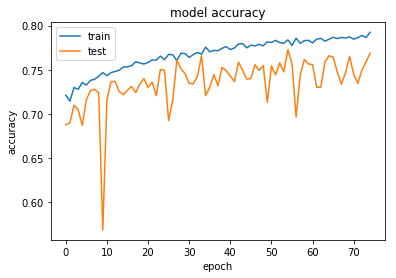

In [43]:
plt.plot(history_2.history['acc'])
plt.plot(history_2.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

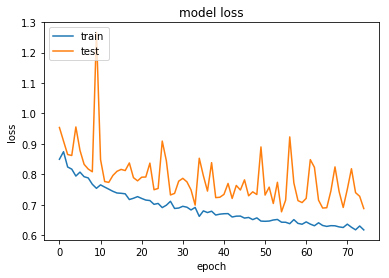

In [44]:
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [31]:
model_conv_1 = Sequential()
model_conv_1.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1),
                 activation='relu',
                 input_shape=(32,32,3)))
model_conv_1.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model_conv_1.add(Dropout(.33))
model_conv_1.add(Conv2D(64, (3, 3), activation='relu'))
model_conv_1.add(Conv2D(64, (3, 3), activation='relu'))
model_conv_1.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model_conv_1.add(Dropout(.33))
model_conv_1.add(Conv2D(64, (3, 3), activation='relu'))
model_conv_1.add(Conv2D(128, (2, 2), activation='relu'))
model_conv_1.add(MaxPooling2D(pool_size=(1, 1), strides=(1, 1)))
model_conv_1.add(Dropout(.33))
model_conv_1.add(Flatten())
model_conv_1.add(Dense(1000, activation='relu'))
model_conv_1.add(Dense(10, activation='softmax'))

In [32]:
rms = keras.optimizers.RMSprop(lr=0.0005)
model_conv_1.compile(loss='categorical_crossentropy',
              optimizer=rms,
              metrics=['accuracy'])

In [47]:
history_2 = model_conv_1.fit(X_train/255, y_train,
          batch_size=1000,
          epochs=200,
          verbose=1,
          validation_data=(X_test/255, y_test),
          callbacks=None)

Train on 40000 samples, validate on 10000 samples
Epoch 1/200
40000/40000 [==============================] - 127s 3ms/step - loss: 2.1989 - acc: 0.1864 - val_loss: 1.9906 - val_acc: 0.2653
Epoch 2/200
40000/40000 [==============================] - 125s 3ms/step - loss: 1.9762 - acc: 0.2741 - val_loss: 2.0385 - val_acc: 0.2501
Epoch 3/200
40000/40000 [==============================] - 122s 3ms/step - loss: 1.9137 - acc: 0.3008 - val_loss: 1.8261 - val_acc: 0.3516
Epoch 4/200
40000/40000 [==============================] - 124s 3ms/step - loss: 1.8257 - acc: 0.3360 - val_loss: 1.7124 - val_acc: 0.3757
Epoch 5/200
40000/40000 [==============================] - 124s 3ms/step - loss: 1.7861 - acc: 0.3564 - val_loss: 1.6912 - val_acc: 0.3873
Epoch 6/200
40000/40000 [==============================] - 124s 3ms/step - loss: 1.7399 - acc: 0.3655 - val_loss: 1.7154 - val_acc: 0.3842
Epoch 7/200
40000/40000 [==============================] - 131s 3ms/step - loss: 1.6944 - acc: 0.3817 - val_loss: 1.

40000/40000 [==============================] - 121s 3ms/step - loss: 0.7033 - acc: 0.7494 - val_loss: 0.7788 - val_acc: 0.7294
Epoch 118/200
40000/40000 [==============================] - 123s 3ms/step - loss: 0.6949 - acc: 0.7517 - val_loss: 0.7950 - val_acc: 0.7260
Epoch 119/200
40000/40000 [==============================] - 123s 3ms/step - loss: 0.6923 - acc: 0.7556 - val_loss: 0.8195 - val_acc: 0.7181
Epoch 120/200
40000/40000 [==============================] - 122s 3ms/step - loss: 0.6945 - acc: 0.7516 - val_loss: 0.8329 - val_acc: 0.7152
Epoch 121/200
40000/40000 [==============================] - 124s 3ms/step - loss: 0.6909 - acc: 0.7553 - val_loss: 0.7853 - val_acc: 0.7290
Epoch 122/200
40000/40000 [==============================] - 123s 3ms/step - loss: 0.6864 - acc: 0.7555 - val_loss: 0.7729 - val_acc: 0.7360
Epoch 123/200
40000/40000 [==============================] - 121s 3ms/step - loss: 0.6832 - acc: 0.7574 - val_loss: 0.7650 - val_acc: 0.7326
Epoch 124/200
40000/40000 [

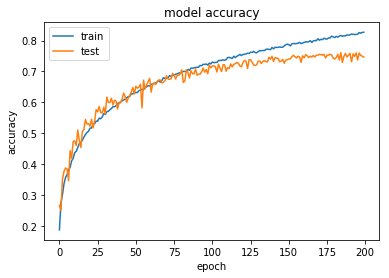

In [48]:
plt.plot(history_2.history['acc'])
plt.plot(history_2.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

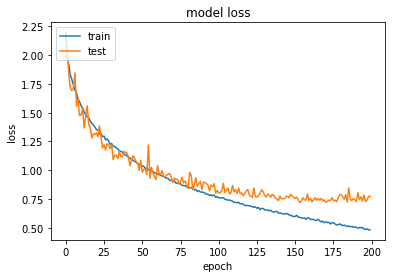

In [49]:
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [50]:
history_3 = model_conv_1.fit(X_train/255, y_train,
          batch_size=1000,
          epochs=200,
          verbose=1,
          validation_data=(X_test/255, y_test),
          callbacks=None)

Train on 40000 samples, validate on 10000 samples
Epoch 1/200
40000/40000 [==============================] - 122s 3ms/step - loss: 0.4890 - acc: 0.8258 - val_loss: 0.7825 - val_acc: 0.7452
Epoch 2/200
40000/40000 [==============================] - 122s 3ms/step - loss: 0.4856 - acc: 0.8259 - val_loss: 0.7237 - val_acc: 0.7597
Epoch 3/200
40000/40000 [==============================] - 120s 3ms/step - loss: 0.4753 - acc: 0.8284 - val_loss: 0.7454 - val_acc: 0.7565
Epoch 4/200
40000/40000 [==============================] - 120s 3ms/step - loss: 0.4740 - acc: 0.8301 - val_loss: 0.7464 - val_acc: 0.7531
Epoch 5/200
40000/40000 [==============================] - 120s 3ms/step - loss: 0.4822 - acc: 0.8255 - val_loss: 0.7680 - val_acc: 0.7459
Epoch 6/200
40000/40000 [==============================] - 120s 3ms/step - loss: 0.4743 - acc: 0.8292 - val_loss: 0.7286 - val_acc: 0.7624
Epoch 7/200
40000/40000 [==============================] - 122s 3ms/step - loss: 0.4722 - acc: 0.8292 - val_loss: 0.

40000/40000 [==============================] - 144s 4ms/step - loss: 0.3097 - acc: 0.8882 - val_loss: 0.8206 - val_acc: 0.7568
Epoch 118/200
40000/40000 [==============================] - 134s 3ms/step - loss: 0.3020 - acc: 0.8937 - val_loss: 0.8569 - val_acc: 0.7547
Epoch 119/200
40000/40000 [==============================] - 126s 3ms/step - loss: 0.3104 - acc: 0.8885 - val_loss: 0.8034 - val_acc: 0.7593
Epoch 120/200
40000/40000 [==============================] - 136s 3ms/step - loss: 0.3038 - acc: 0.8910 - val_loss: 0.8102 - val_acc: 0.7647
Epoch 121/200
40000/40000 [==============================] - 129s 3ms/step - loss: 0.3013 - acc: 0.8916 - val_loss: 0.8613 - val_acc: 0.7453
Epoch 122/200
40000/40000 [==============================] - 122s 3ms/step - loss: 0.3095 - acc: 0.8901 - val_loss: 0.8225 - val_acc: 0.7645
Epoch 123/200
40000/40000 [==============================] - 133s 3ms/step - loss: 0.3005 - acc: 0.8912 - val_loss: 0.8735 - val_acc: 0.7501
Epoch 124/200
40000/40000 [

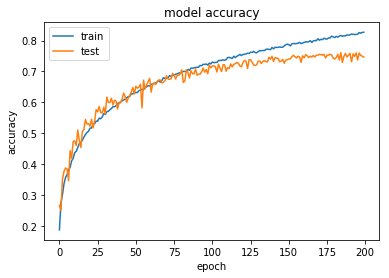

In [51]:
plt.plot(history_3.history['acc'])
plt.plot(history_3.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

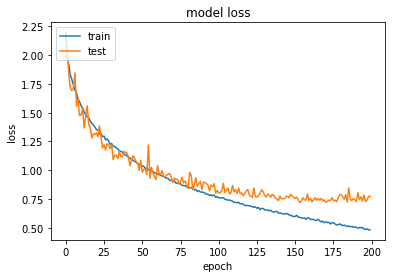

In [ ]:
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
history_4 = model_conv_1.fit(X_train/255, y_train,
          batch_size=2000,
          epochs=600,
          verbose=1,
          validation_data=(X_test/255, y_test),
          callbacks=None)

Train on 40000 samples, validate on 10000 samples
Epoch 1/600
40000/40000 [==============================] - 133s 3ms/step - loss: 2.3065 - acc: 0.1678 - val_loss: 2.1296 - val_acc: 0.2324
Epoch 2/600
40000/40000 [==============================] - 121s 3ms/step - loss: 2.1556 - acc: 0.2108 - val_loss: 2.1358 - val_acc: 0.2219
Epoch 3/600
40000/40000 [==============================] - 120s 3ms/step - loss: 2.1061 - acc: 0.2340 - val_loss: 2.0106 - val_acc: 0.2987
Epoch 4/600
40000/40000 [==============================] - 120s 3ms/step - loss: 2.0143 - acc: 0.2706 - val_loss: 1.9162 - val_acc: 0.3291
Epoch 5/600
40000/40000 [==============================] - 129s 3ms/step - loss: 1.9549 - acc: 0.2903 - val_loss: 1.9182 - val_acc: 0.3057
Epoch 6/600
40000/40000 [==============================] - 140s 4ms/step - loss: 1.9236 - acc: 0.3022 - val_loss: 1.8917 - val_acc: 0.3077
Epoch 7/600
40000/40000 [==============================] - 122s 3ms/step - loss: 1.9378 - acc: 0.3046 - val_loss: 1.

40000/40000 [==============================] - 253s 6ms/step - loss: 1.2390 - acc: 0.5569 - val_loss: 1.2072 - val_acc: 0.5725
Epoch 60/600
40000/40000 [==============================] - 263s 7ms/step - loss: 1.2226 - acc: 0.5615 - val_loss: 1.1677 - val_acc: 0.5869
Epoch 61/600
40000/40000 [==============================] - 261s 7ms/step - loss: 1.2233 - acc: 0.5637 - val_loss: 1.2373 - val_acc: 0.5628
Epoch 62/600
40000/40000 [==============================] - 211s 5ms/step - loss: 1.2123 - acc: 0.5691 - val_loss: 1.2082 - val_acc: 0.5710
Epoch 63/600
40000/40000 [==============================] - 223s 6ms/step - loss: 1.2210 - acc: 0.5649 - val_loss: 1.1963 - val_acc: 0.5662
Epoch 64/600
40000/40000 [==============================] - 229s 6ms/step - loss: 1.1949 - acc: 0.5724 - val_loss: 1.1712 - val_acc: 0.5816
Epoch 65/600
40000/40000 [==============================] - 210s 5ms/step - loss: 1.2054 - acc: 0.5707 - val_loss: 1.1545 - val_acc: 0.5876
Epoch 66/600
40000/40000 [=======

40000/40000 [==============================] - 124s 3ms/step - loss: 0.9889 - acc: 0.6496 - val_loss: 0.9521 - val_acc: 0.6638
Epoch 118/600
40000/40000 [==============================] - 122s 3ms/step - loss: 0.9729 - acc: 0.6563 - val_loss: 0.9564 - val_acc: 0.6649
Epoch 119/600
40000/40000 [==============================] - 124s 3ms/step - loss: 0.9718 - acc: 0.6549 - val_loss: 0.9423 - val_acc: 0.6647
Epoch 120/600
40000/40000 [==============================] - 122s 3ms/step - loss: 0.9794 - acc: 0.6523 - val_loss: 0.9660 - val_acc: 0.6602
Epoch 121/600
40000/40000 [==============================] - 122s 3ms/step - loss: 0.9639 - acc: 0.6576 - val_loss: 1.0172 - val_acc: 0.6463
Epoch 122/600
40000/40000 [==============================] - 129s 3ms/step - loss: 0.9660 - acc: 0.6554 - val_loss: 0.9547 - val_acc: 0.6633
Epoch 123/600
40000/40000 [==============================] - 129s 3ms/step - loss: 0.9588 - acc: 0.6603 - val_loss: 0.9815 - val_acc: 0.6590
Epoch 124/600
40000/40000 [

40000/40000 [==============================] - 122s 3ms/step - loss: 0.8090 - acc: 0.7141 - val_loss: 0.8362 - val_acc: 0.7093
Epoch 176/600
40000/40000 [==============================] - 125s 3ms/step - loss: 0.8106 - acc: 0.7099 - val_loss: 0.9388 - val_acc: 0.6820
Epoch 177/600
40000/40000 [==============================] - 2149s 54ms/step - loss: 0.8107 - acc: 0.7089 - val_loss: 0.7990 - val_acc: 0.7185
Epoch 178/600
40000/40000 [==============================] - 129s 3ms/step - loss: 0.8169 - acc: 0.7112 - val_loss: 0.8498 - val_acc: 0.7027
Epoch 179/600
40000/40000 [==============================] - 125s 3ms/step - loss: 0.7948 - acc: 0.7159 - val_loss: 0.8779 - val_acc: 0.6962
Epoch 180/600
40000/40000 [==============================] - 120s 3ms/step - loss: 0.8149 - acc: 0.7086 - val_loss: 0.8342 - val_acc: 0.7105
Epoch 181/600
40000/40000 [==============================] - 119s 3ms/step - loss: 0.7912 - acc: 0.7186 - val_loss: 0.8759 - val_acc: 0.6978
Epoch 182/600
40000/40000

40000/40000 [==============================] - 149s 4ms/step - loss: 0.7076 - acc: 0.7458 - val_loss: 0.8394 - val_acc: 0.7094
Epoch 234/600
40000/40000 [==============================] - 130s 3ms/step - loss: 0.6826 - acc: 0.7579 - val_loss: 0.7976 - val_acc: 0.7255
Epoch 235/600
40000/40000 [==============================] - 131s 3ms/step - loss: 0.7005 - acc: 0.7493 - val_loss: 0.7860 - val_acc: 0.7280
Epoch 236/600
40000/40000 [==============================] - 129s 3ms/step - loss: 0.6771 - acc: 0.7586 - val_loss: 0.7832 - val_acc: 0.7306
Epoch 237/600
40000/40000 [==============================] - 131s 3ms/step - loss: 0.6945 - acc: 0.7540 - val_loss: 0.8625 - val_acc: 0.7040
Epoch 238/600
40000/40000 [==============================] - 129s 3ms/step - loss: 0.6871 - acc: 0.7527 - val_loss: 0.8265 - val_acc: 0.7154
Epoch 239/600
40000/40000 [==============================] - 3724s 93ms/step - loss: 0.6947 - acc: 0.7542 - val_loss: 0.7852 - val_acc: 0.7267
Epoch 240/600
40000/40000

40000/40000 [==============================] - 121s 3ms/step - loss: 0.6043 - acc: 0.7837 - val_loss: 0.7521 - val_acc: 0.7430
Epoch 292/600
40000/40000 [==============================] - 120s 3ms/step - loss: 0.6095 - acc: 0.7818 - val_loss: 0.7717 - val_acc: 0.7380
Epoch 293/600
40000/40000 [==============================] - 125s 3ms/step - loss: 0.5828 - acc: 0.7916 - val_loss: 0.7938 - val_acc: 0.7290
Epoch 294/600
40000/40000 [==============================] - 120s 3ms/step - loss: 0.5993 - acc: 0.7841 - val_loss: 0.7529 - val_acc: 0.7485
Epoch 295/600
40000/40000 [==============================] - 131s 3ms/step - loss: 0.6082 - acc: 0.7837 - val_loss: 0.7303 - val_acc: 0.7503
Epoch 296/600
40000/40000 [==============================] - 121s 3ms/step - loss: 0.5983 - acc: 0.7869 - val_loss: 0.7492 - val_acc: 0.7449
Epoch 297/600
40000/40000 [==============================] - 123s 3ms/step - loss: 0.5943 - acc: 0.7866 - val_loss: 0.7428 - val_acc: 0.7452
Epoch 298/600
40000/40000 [

In [ ]:
plt.plot(history_4.history['acc'])
plt.plot(history_4.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
plt.plot(history_4.history['loss'])
plt.plot(history_4.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [35]:
model_conv = Sequential()
model_conv.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1),
                 activation='relu',
                 input_shape=(32,32,3)))
model_conv.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model_conv.add(Dropout(.33))
model_conv.add(Conv2D(64, (3, 3), activation='relu'))
model_conv.add(Dropout(.33))
model_conv.add(Conv2D(64, (3, 3), activation='relu'))
model_conv.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model_conv.add(Dropout(.33))
model_conv.add(Conv2D(64, (3, 3), activation='relu'))
model_conv.add(Conv2D(128, (2, 2), activation='relu'))
model_conv.add(Dropout(.33))
model_conv.add(Conv2D(128, (2, 2), activation='relu'))
model_conv.add(MaxPooling2D(pool_size=(1, 1), strides=(1, 1)))
model_conv.add(Flatten())
model_conv.add(Dense(1000, activation='relu'))
model_conv.add(Dense(10, activation='softmax'))

In [36]:
rms = keras.optimizers.RMSprop(lr=0.007)
model_conv.compile(loss='categorical_crossentropy',
              optimizer=rms,
              metrics=['accuracy'])

In [37]:
model_conv.fit(X_train/255, y_train,
          batch_size=60,
          epochs=200,
          verbose=1,
          validation_data=(X_test/255, y_test),
          callbacks=None)

Train on 40000 samples, validate on 10000 samples
Epoch 1/200
40000/40000 [==============================] - 150s 4ms/step - loss: 14.4952 - acc: 0.0995 - val_loss: 14.4821 - val_acc: 0.1015
Epoch 2/200
40000/40000 [==============================] - 148s 4ms/step - loss: 14.5123 - acc: 0.0996 - val_loss: 14.4821 - val_acc: 0.1015
Epoch 3/200
40000/40000 [==============================] - 143s 4ms/step - loss: 4.8432 - acc: 0.1145 - val_loss: 2.1935 - val_acc: 0.1698
Epoch 4/200
40000/40000 [==============================] - 144s 4ms/step - loss: 2.1600 - acc: 0.1879 - val_loss: 2.2174 - val_acc: 0.1865
Epoch 5/200
40000/40000 [==============================] - 142s 4ms/step - loss: 2.0495 - acc: 0.2266 - val_loss: 1.9710 - val_acc: 0.2463
Epoch 6/200
40000/40000 [==============================] - 143s 4ms/step - loss: 1.9864 - acc: 0.2541 - val_loss: 1.8968 - val_acc: 0.2746
Epoch 7/200
40000/40000 [==============================] - 148s 4ms/step - loss: 1.9513 - acc: 0.2663 - val_loss

KeyboardInterrupt: 

In [31]:
# Second update Wednesday morning
model_conv = Sequential()
model_conv.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1),
                 activation='relu',
                 input_shape=(32,32,3)))
model_conv.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model_conv.add(Conv2D(64, (3, 3), activation='relu'))
model_conv.add(Conv2D(64, (3, 3), activation='relu'))
model_conv.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model_conv.add(Conv2D(64, (3, 3), activation='relu'))
model_conv.add(Conv2D(128, (2, 2), activation='relu'))
model_conv.add(MaxPooling2D(pool_size=(1, 1), strides=(1, 1)))
model_conv.add(Flatten())
model_conv.add(Dropout(.33))
model_conv.add(Dense(1000, activation='relu'))
model_conv.add(Dropout(.33))
model_conv.add(Dense(10, activation='softmax'))

In [32]:
rms = keras.optimizers.RMSprop(lr=0.0005)
model_conv.compile(loss='categorical_crossentropy',
              optimizer=rms,
              metrics=['accuracy'])

In [33]:
history = model_conv.fit(X_train/255, y_train,
          batch_size=60,
          epochs=200,
          verbose=1,
          validation_data=(X_test/255, y_test),
          callbacks=None)

Train on 40000 samples, validate on 10000 samples
Epoch 1/200
40000/40000 [==============================] - 250s 6ms/step - loss: 1.8238 - acc: 0.3275 - val_loss: 1.5485 - val_acc: 0.4318
Epoch 2/200
40000/40000 [==============================] - 155s 4ms/step - loss: 1.4591 - acc: 0.4724 - val_loss: 1.4112 - val_acc: 0.4916
Epoch 3/200
40000/40000 [==============================] - 150s 4ms/step - loss: 1.3075 - acc: 0.5308 - val_loss: 1.2044 - val_acc: 0.5688
Epoch 4/200
40000/40000 [==============================] - 153s 4ms/step - loss: 1.1995 - acc: 0.5709 - val_loss: 1.2178 - val_acc: 0.5738
Epoch 5/200
40000/40000 [==============================] - 149s 4ms/step - loss: 1.1099 - acc: 0.6070 - val_loss: 1.0817 - val_acc: 0.6162
Epoch 6/200
40000/40000 [==============================] - 156s 4ms/step - loss: 1.0372 - acc: 0.6337 - val_loss: 1.1651 - val_acc: 0.5930
Epoch 7/200
40000/40000 [==============================] - 160s 4ms/step - loss: 0.9762 - acc: 0.6583 - val_loss: 1.

40000/40000 [==============================] - 134s 3ms/step - loss: 1.3957 - acc: 0.5743 - val_loss: 1.4106 - val_acc: 0.5354
Epoch 118/200
40000/40000 [==============================] - 136s 3ms/step - loss: 1.4229 - acc: 0.5733 - val_loss: 1.2989 - val_acc: 0.6080
Epoch 119/200
40000/40000 [==============================] - 153s 4ms/step - loss: 1.8392 - acc: 0.5652 - val_loss: 1.5075 - val_acc: 0.6007
Epoch 120/200
40000/40000 [==============================] - 235s 6ms/step - loss: 1.5071 - acc: 0.5713 - val_loss: 1.3346 - val_acc: 0.5150
Epoch 121/200
40000/40000 [==============================] - 272s 7ms/step - loss: 1.4576 - acc: 0.5670 - val_loss: 1.4032 - val_acc: 0.5028
Epoch 122/200
40000/40000 [==============================] - 261s 7ms/step - loss: 1.4214 - acc: 0.5683 - val_loss: 1.4151 - val_acc: 0.5038
Epoch 123/200
40000/40000 [==============================] - 253s 6ms/step - loss: 1.4176 - acc: 0.5601 - val_loss: 1.5455 - val_acc: 0.4469
Epoch 124/200
40000/40000 [

In [55]:
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


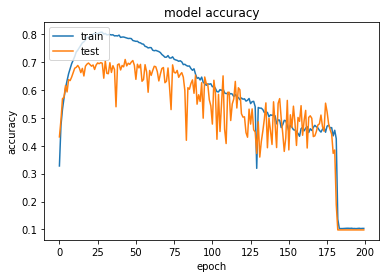

In [34]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

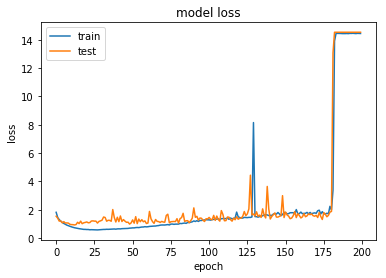

In [35]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()